Intro to Machine Learning
=========================

>
> Data quality = prediction quality!
>
> Price = x, Target Price = y, Beta = z, Sector = Tech
>

In [1]:
# import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# set up paths

from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Access the PROJECT_PATH variable
project_path = os.getenv("PROJECT_PATH")

# Exercise

In [2]:
df_stock_data = pd.read_csv(os.path.join(project_path, 'stock_data_v2.csv'))

In [3]:
df_stock_data.head(5)

,Ticker,Name,Sector,Beta,Market Cap,Current Price,Price Target,Price Increase,Return
0,AAPL,APPLE INC,Information Technology,1.09,1081130615,223.84,232.27,8.43,0.038
1,AMZN,AMAZON.COM INC,Consumer Discretionary,1.23,960942834,1970.19,2133.39,163.20,0.083
2,MSFT,MICROSOFT CORP,Information Technology,1.46,869345788,113.37,122.30,8.93,0.079
3,GOOGL,ALPHABET INC-A,Information Technology,1.44,817459888,1177.98,1384.89,206.91,0.176
4,BRK/A,BERKSHIRE HATH-A,Financials,1.13,534247506,324999.00,357125.00,32126.00,0.099


In [4]:
df_stock_data.count()

Ticker            100
Name              100
Sector             93
Beta              100
Market Cap        100
Current Price     100
Price Target       93
Price Increase     93
Return             93
dtype: int64

In [5]:
df_stock_data.count() == 100

Ticker             True
Name               True
Sector            False
Beta               True
Market Cap         True
Current Price      True
Price Target      False
Price Increase    False
Return            False
dtype: bool

In [6]:
for columns in df_stock_data.columns[df_stock_data.count() != len(df_stock_data)]:
    print(columns + " - " + str(df_stock_data[columns].count()))

Sector - 93
Price Target - 93
Price Increase - 93
Return - 93


In [7]:
# display unique values of 'Sector' column

set(df_stock_data['Sector'])

# unique values as array, but not ordered
# df_stock_data['Sector'].unique()

{'Consumer Discretionary',
 'Consumer Staples',
 'Energy',
 'Enersy',
 'Financials',
 'Health Care',
 'Industrial$',
 'Industrials',
 'Information Technology',
 'Information Technology .',
 'Materials',
 'Real Estate',
 'Telecommunication Services',
 'Utilities',
 'lndustrials',
 nan}

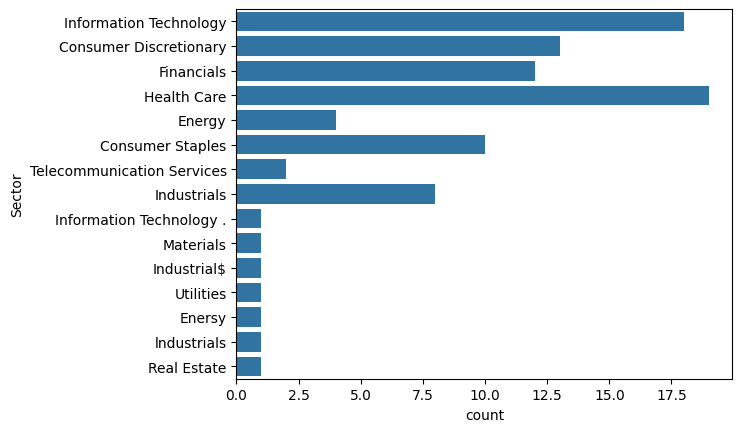

In [8]:
sns.countplot(y='Sector', data= df_stock_data)
plt.show()

How to fix:

In [9]:
df_stock_data.Sector.replace('Enersy', 'Energy', inplace=True)
df_stock_data.Sector.replace(['Industrial$', 'lndustrials'], 'Industrials', inplace=True)
df_stock_data.Sector.replace('Information Technology .', 'Information Technology', inplace=True)

/var/folders/gq/wf94nnj16zqczffkrs_xthph0000gn/T/ipykernel_12986/192970906.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_stock_data.Sector.replace('Enersy', 'Energy', inplace=True)
/var/folders/gq/wf94nnj16zqczffkrs_xthph0000gn/T/ipykernel_12986/192970906.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

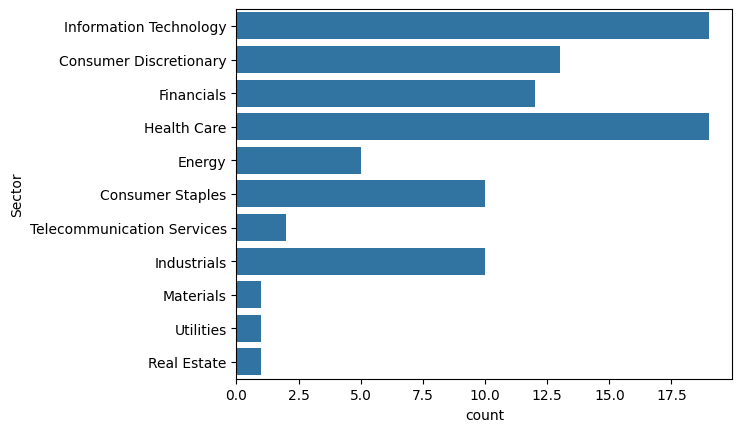

In [10]:
sns.countplot(y='Sector', data= df_stock_data)
plt.show()

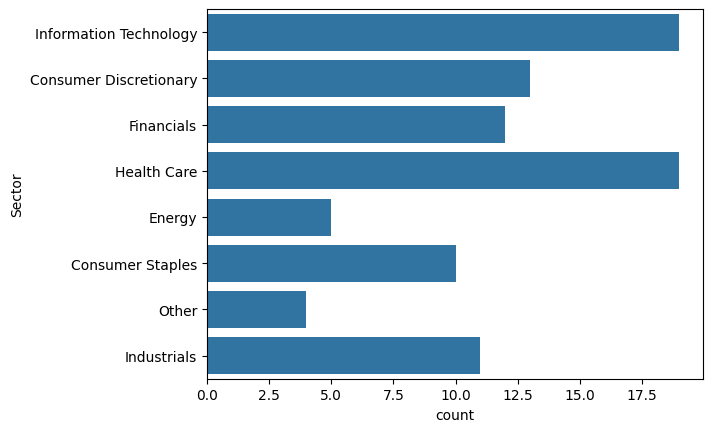

In [11]:
df_stock_data.Sector.replace('Materials', 'Industrials', inplace=True)
df_stock_data.Sector.replace(['Telecommunication Services', 'Utilities', 'Real Estate'], 'Other', inplace=True)

sns.countplot(y='Sector', data= df_stock_data)
plt.show()

# Histogram

In [31]:
df_stock_data.describe()

,Beta,Market Cap,Current Price,Price Target,Price Increase,Return
count,100.000000,1.000000e+02,100.000000,93.000000,93.000000,93.000000
mean,0.995800,1.756136e+08,3441.165500,4051.011720,364.757312,0.093785
std,0.283446,1.806083e+08,32481.881894,37011.566893,3329.559536,0.073745
min,0.220000,6.389023e+07,12.680000,15.560000,-11.770000,-0.047000
25%,0.810000,8.195384e+07,69.630000,74.530000,3.880000,0.035000
50%,0.990000,1.119556e+08,117.600000,123.930000,8.930000,0.079000
75%,1.182500,1.987309e+08,219.430000,217.130000,16.560000,0.149000
max,1.840000,1.081131e+09,324999.000000,357125.000000,32126.000000,0.270000


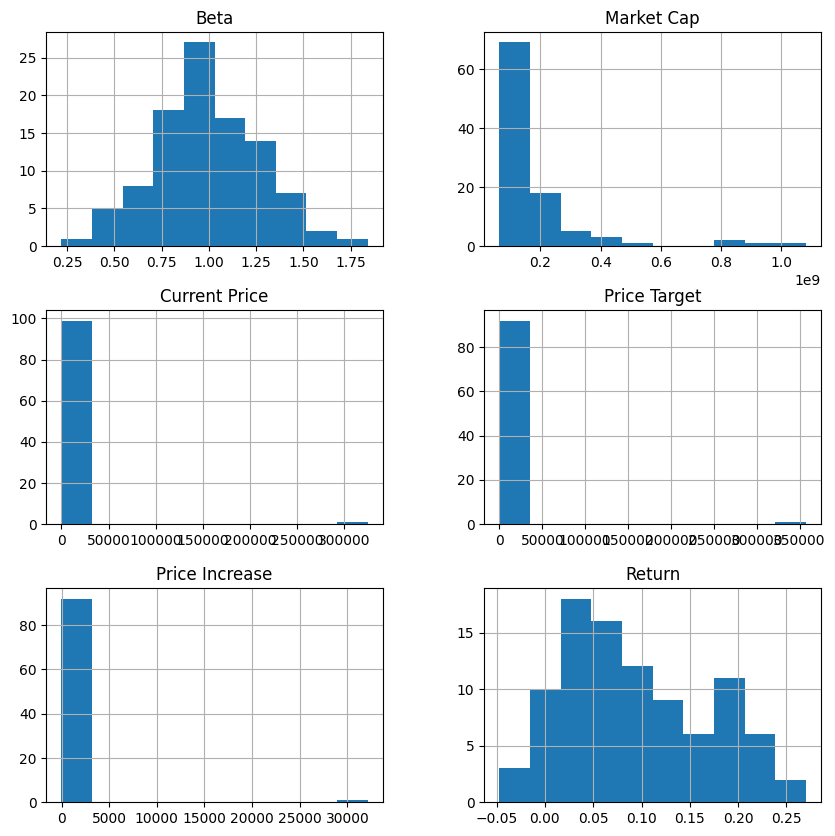

In [37]:
df_stock_data.hist(figsize=(10, 10))
plt.show()

In [30]:
df_stock_data[df_stock_data['Current Price'] == df_stock_data['Current Price'].max()]

,Ticker,Name,Sector,Beta,Market Cap,Current Price,Price Target,Price Increase,Return
4,BRK/A,BERKSHIRE HATH-A,Financials,1.13,534247506,324999.0,357125.0,32126.0,0.099


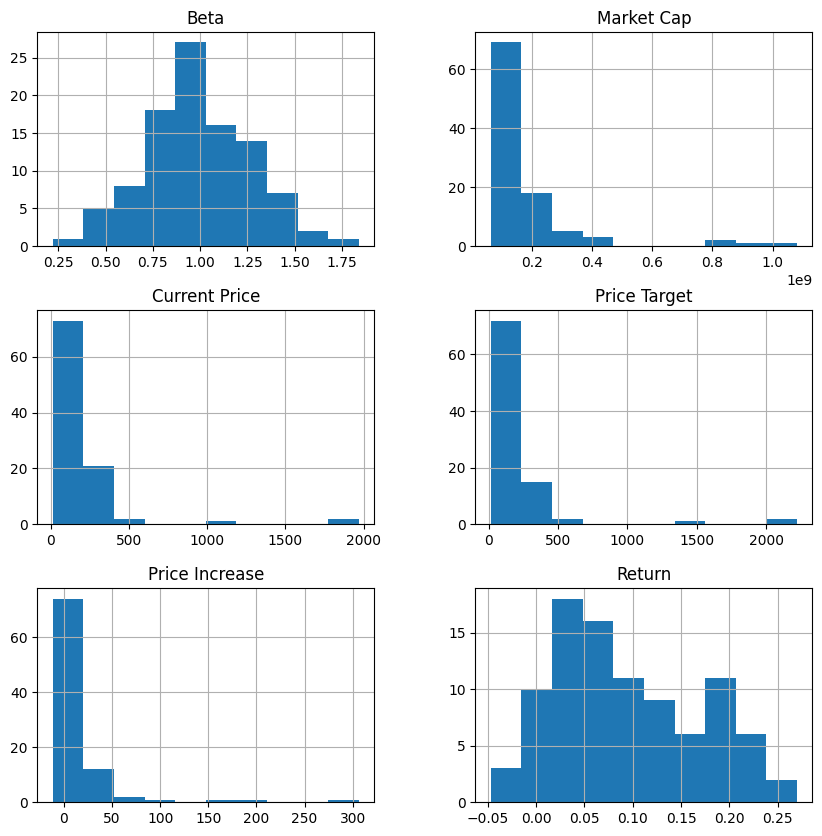

In [39]:
df_stock_data[df_stock_data['Ticker'] != 'BRK/A'].hist(figsize=(10, 10))
plt.show()

In [41]:
df_stock_data[df_stock_data['Current Price'] > 1000]

,Ticker,Name,Sector,Beta,Market Cap,Current Price,Price Target,Price Increase,Return
1,AMZN,AMAZON.COM INC,Consumer Discretionary,1.23,960942834,1970.19,2133.39,163.20,0.083
3,GOOGL,ALPHABET INC-A,Information Technology,1.44,817459888,1177.98,1384.89,206.91,0.176
4,BRK/A,BERKSHIRE HATH-A,Financials,1.13,534247506,324999.00,357125.00,32126.00,0.099
66,BKNG,BOOKING HOLDINGS,Consumer Discretionary,0.74,90969219,1916.27,2222.78,306.51,0.160


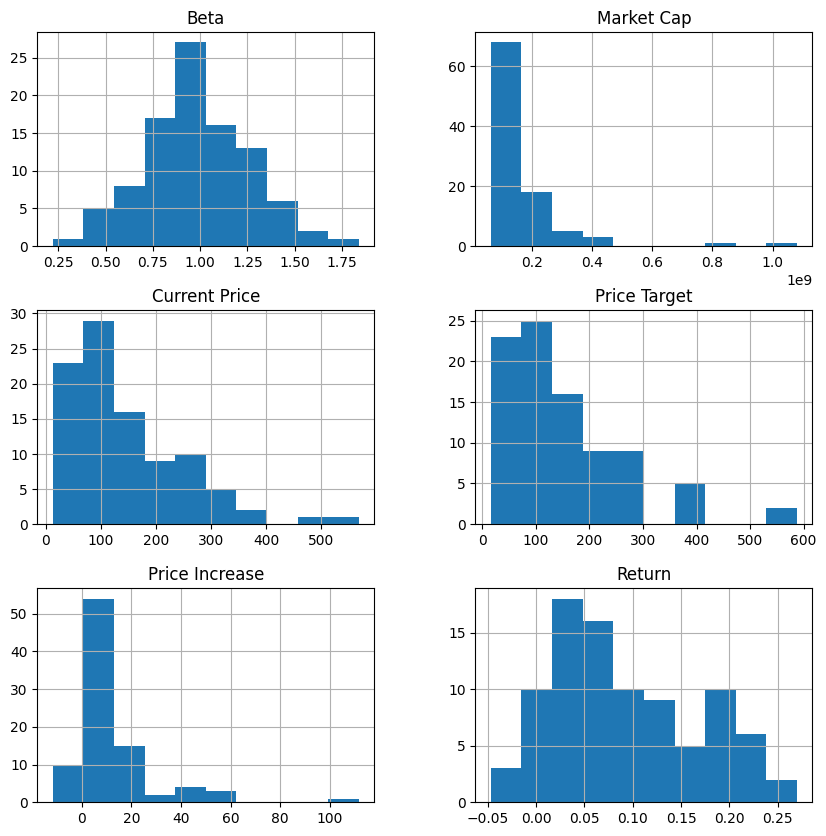

In [46]:
df_stock_data[df_stock_data['Current Price'] < 1000].hist(figsize=(10, 10))
plt.show()

Decision to remove tickers with Current Price over $1000

In [54]:
df_stock_data_sans_outliers = df_stock_data[df_stock_data['Current Price'] < 1000]

print('Entries removed: ' + str(len(df_stock_data[df_stock_data['Current Price'] > 1000])))
print('New table length: ' + str(len(df_stock_data_sans_outliers)))

Entries removed: 4
New table length: 96


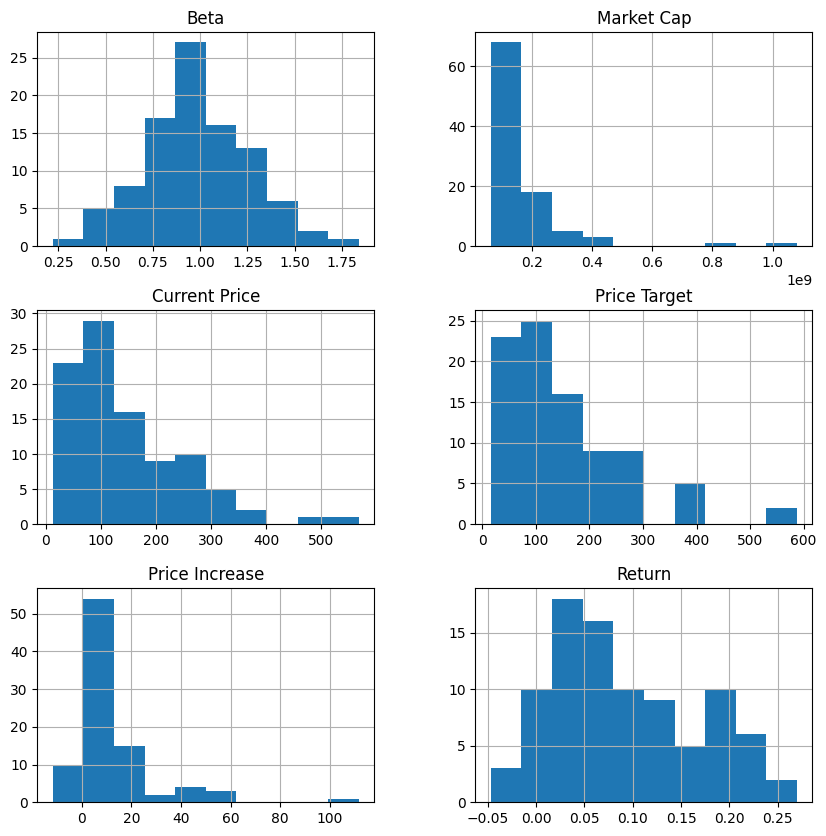

In [49]:

df_stock_data_sans_outliers.hist(figsize=(10, 10))
plt.show()

In [51]:
# summary

round(df_stock_data_sans_outliers.describe(), 2)

,Beta,Market Cap,Current Price,Price Target,Price Increase,Return
count,96.00,9.600000e+01,96.00,89.00,89.00,89.00
mean,0.99,1.578931e+08,146.39,155.93,12.58,0.09
std,0.28,1.463478e+08,102.90,112.55,16.87,0.07
min,0.22,6.389023e+07,12.68,15.56,-11.77,-0.05
25%,0.81,8.099544e+07,68.54,71.57,3.74,0.03
50%,0.98,1.102842e+08,114.23,122.15,8.65,0.08
75%,1.16,1.884832e+08,204.03,205.93,14.25,0.15
max,1.84,1.081131e+09,568.36,587.79,111.73,0.27


In [55]:
# remove NaN

df_stock_data_sans_outliers_nan = df_stock_data_sans_outliers.dropna()
df_stock_data_sans_outliers_nan.describe()

,Beta,Market Cap,Current Price,Price Target,Price Increase,Return
count,89.000000,8.900000e+01,89.000000,89.000000,89.000000,89.00000
mean,0.992360,1.606791e+08,143.350787,155.932921,12.582135,0.09218
std,0.291064,1.504772e+08,102.779789,112.550556,16.865557,0.07453
min,0.220000,6.389023e+07,12.680000,15.560000,-11.770000,-0.04700
25%,0.810000,8.197373e+07,68.580000,71.570000,3.740000,0.03400
50%,0.980000,1.135957e+08,113.500000,122.150000,8.650000,0.07800
75%,1.180000,1.955919e+08,200.580000,205.930000,14.250000,0.14700
max,1.840000,1.081131e+09,568.360000,587.790000,111.730000,0.27000


# Boxplots

In [57]:
df2 = df_stock_data_sans_outliers_nan

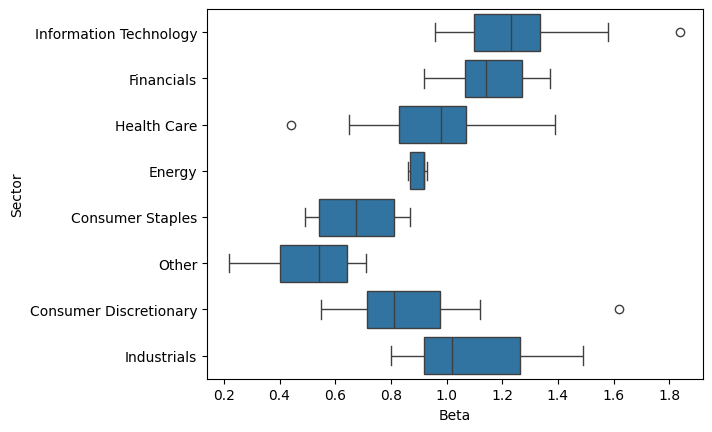

In [ ]:
# BOXPLOT: Beta by Sector

sns.boxplot(y='Sector', x='Beta', data=df2)
plt.show()

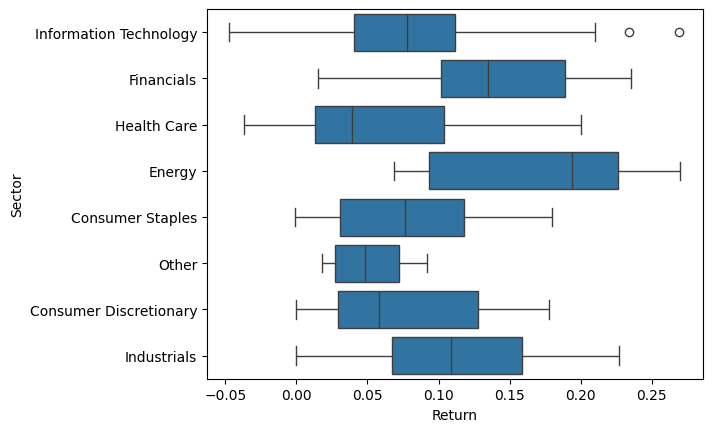

In [60]:

# BOXPLOT: Return by Sector

sns.boxplot(x= 'Return', y= 'Sector', data= df2)
plt.show()

In [62]:
df2.to_csv(os.path.join(project_path, 'stock_data_clean.csv'), index=None)